# *Matanceros, en todas partes*

Las circunstancias de la vida me obligaron a emigrar de mi provincia natal, Matanzas, la Atenas de Cuba. Dejé en uno de sus municipios, Cárdenas, memorables recuerdos que sin duda me marcarán por el resto de mi vida, para adentrarme en La Habana, descrita por mi como “otro mundo”, que al llegar por primera vez te envuelve entre sus garras, con sus altos e históricos edificios, la inmensa cantidad de gente, y el ruido de los carros a toda hora. Situaciones a las que un matancero no se acostumbra tan fácil.

Evidentemente, emigré desde que comenzaron mis estudios en la Universidad de La Habana, en busca de mejores oportunidades de estudio y preparación, ya que a veces en tu lugar de origen no tienes todo lo que quieres y es tu deber aventurarte a buscarlo.

Como yo, muchos matanceros emigran hacia otras provincias del país, cada cual, con su motivo personal. Para indagar un poco más acerca de esto, realicé una encuesta con el objetivo de recopilar datos que reflejaran los principales motivos por los que los nacidos en Matanzas se trasladaban a las restantes provincias e incluso a otros municipios de la ciudad Atenas.
Una de las interrogantes de la encuesta fue la siguiente: ¿Te gustaría en un futuro emigrar a otra provincia del país? y en caso negativo ¿A dónde emigrarían los matanceros dentro de su provincia?. En el siguiente gráfico quedan evidenciadas las respuestas.




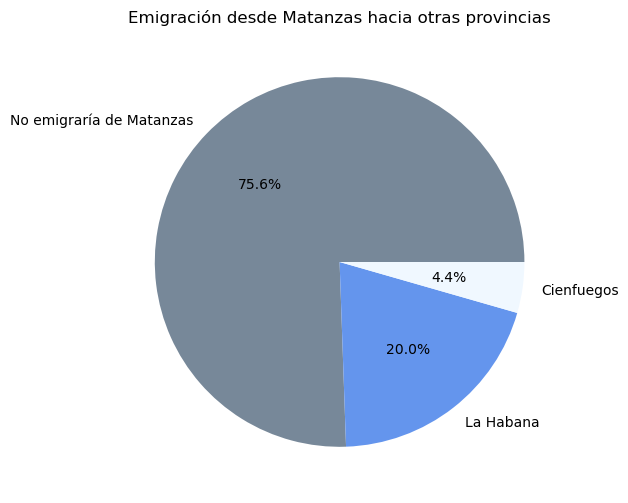

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import json

# Crear un DataFrame de pandas con los datos de la encuesta
with open('encuesta.json',encoding="utf8") as json_data: 
    data = json.load(json_data)  
    
df = pd.DataFrame(data)

# Contar el número de respuestas para cada provincia
conteo_provincias = df['¿A cuál provincia emigraría?'].value_counts()

colors=['lightslategray','cornflowerblue','aliceblue']

# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteo_provincias, labels=conteo_provincias.index, colors=colors, autopct='%1.1f%%')
plt.title('Emigración desde Matanzas hacia otras provincias')
plt.show()

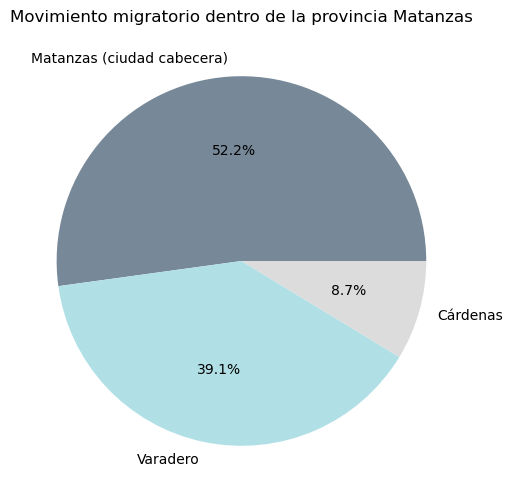

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import json

# Crear un DataFrame de pandas con los datos de la encuesta

with open('encuesta2.json',encoding="utf8") as json_data: 
    data = json.load(json_data)  
    
df = pd.DataFrame(data)

# Contar el número de respuestas para cada provincia
conteo_provincias = df['¿Emigraría hacia otro lugar dentro de MATANZAS?'].value_counts()

colors=['lightslategrey','powderblue','gainsboro'] 

# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(conteo_provincias, labels=conteo_provincias.index, colors=colors,autopct='%1.1f%%')
plt.title('Movimiento migratorio dentro de la provincia Matanzas')
plt.show()

Como se puede apreciar la mayor parte de las personas que respondieron la encuesta NO desean emigrar de la provincia matancera, pero SI de su municipio natal. Por otra parte, los encuestados que, SI deseaban emigrar a otras provincias de nuestro país, seleccionaron en su mayoría a La Habana para establecerse allí en un futuro.

Matanzas (ciudad cabecera) y Varadero (que pertenece al municipio Cárdenas) son los municipios a los que los votantes más les gustaría emigrar. La mayoría señalaron los mismos motivos: en el caso de Varadero, emigrarían por su ubicación geográfica, las playas, y las ofertas de trabajo que brinda esta localidad donde la principal rama de la economía es el turismo y en el caso de Matanzas, alegaron que les gustaba la vida nocturna de la ciudad, que ofrecía mejores oportunidades de trabajo, y resaltaron la belleza de la misma.

### ¿Cuántos matanceros emigran anualmente de su provincia?
*"Emigrar es el acto de abandonar tu lugar de origen para establecerte en otro de forma permanente. Es un proceso que implica mudarse a un lugar diferente, adaptarse a una nueva cultura y sistema de vida."*

Los movimientos migratorios pueden tener varias repercusiones, no únicamente en el sitio al que van a parar, sino también en el de origen. En muchas ocasiones las personas migran de forma multitudinaria, lo cual disminuye considerablemente la población de su lugar de origen.

Esto supone una reducción del desempleo, dado que muchas personas migrantes deciden abandonar su hogar al ver que no logran encontrar trabajo y, los que se quedan, se benefician de la menor competencia laboral. 

En cuanto al lugar receptor, la llegada de personas jóvenes permite que se ocupen empleos que la población nativa no está dispuesta a hacer, por ser trabajos poco cualificados y mal pagados.

Sin embargo, también hay repercusiones negativas. Si la localidad de origen ya era pobre de por sí, el hecho de perder a personas económicamente activas supone un obstáculo añadido. También, al perderse población se pierden posibilidades de consumo.


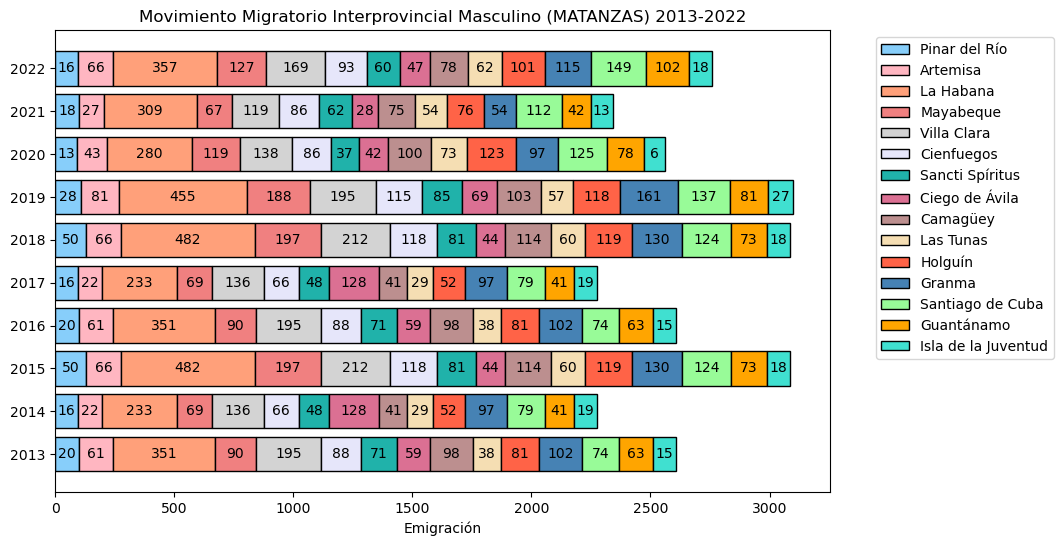

In [95]:
#Importar Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import json

# Abro json , y le digo que lea con la codificación "utf8", de lo contrario da error
with open('emigracion.json',encoding="utf8") as json_data: 
    data = json.load(json_data)  

## lleno listas con los valores del json
provincias = data['provincias']
años = list(data['emigracion'].keys())  # keys devuelve las llaves que hay en "emigracion":{}, que son los años
coloresH  = data['coloresH']

# Creo una lista con todos los valores de "Hombres":[]
lista = [] # Inicializo la lista vacia
for a in años:
   lista.append(data['emigracion'][a]['Hombres']) 

#Convierto la lista a arreglo "Array", porque la función "barh" , para hacer las barras horizontales, dio error con listas
array_hombres = np.array(lista)  

# Creando el gráfico de barras "Agrupadas"
figura = plt.figure(figsize=(10 ,6))              # Creo una figura de tamaño (largo,ancho) 
grafico = figura.add_subplot()                    # Agrego los ejes y la matriz a la figura y la guardo en "grafico"

# Recorro con un ciclo for la lista de provincias 
for i in range(len(provincias)):                              # len, devuelve el longitud de una lista
    barras = grafico.barh(años,                               # barras guardo la barras horizontales creadas en el ciclo con "barh"
            array_hombres[:, i]+80,                           # array_hombres[:, i] hombres de esa provincia (i) +80 para agrandar el área de la barra
            color=colores[i % len(coloresH)],                 # Busco el color con % garantizo que siempre de un valor en el rango 0-15
            edgecolor='black',                                # edgecolor es el color del borde de la barra
            left=np.sum(array_hombres[:, :i]+80, axis=1))     # left es donde empieza la barra que es donde termina la anterior 
  # Las etiquetas 
    for j, rect in enumerate(barras):                         # Ciclo for para las etiquetas, recorriendo todas las barras 
        grafico.text(rect.get_x() + rect.get_width() / 2,     # "text" agrega texto en la barra x,y  posx + largo/2 , poxy + ancho/2  
                rect.get_y() + rect.get_height() / 2,         
                array_hombres[j, i],                          # lo que quieres escrbir en la celda ejemplo "3"
                ha='center', va='center',                     # "ha" centra largo "va" centra en el ancho
                color='black')                                # clor de label "etiqueta"

# Añadir etiquetas y título
grafico.set_xlabel('Emigración')                                                          # set_xlabel Pone el nombre del eje X
grafico.set_title('Movimiento Migratorio Interprovincial Masculino (MATANZAS) 2013-2022')         # Pone el título del gráfico
plt.legend(provincias,bbox_to_anchor=(1.05, 1), loc='upper left')                         # Leyenda la saqué para fuera del gráfico

# Mostrar el gráfico
plt.show()


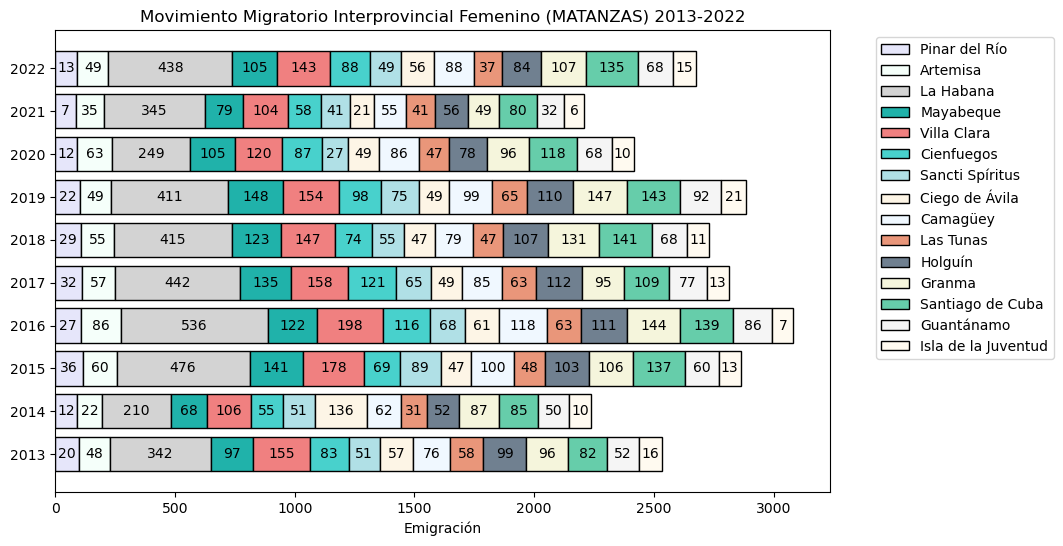

In [94]:
#Importar Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import json

# Abro json , y le digo que lea con la codificación "utf8", de lo contrario da error
with open('emigracion.json',encoding="utf8") as json_data: 
    data = json.load(json_data)  

## lleno listas con los valores del json
provincias = data['provincias']
coloresM  = data['coloresM']
años = list(data['emigracion'].keys())  # keys devuelve las llaves que hay en "emigracion":{}, que son los años

# Creo una lista con todos los valores de "Mujeres":[]
lista = [] # Inicializo la lista vacia
for a in años:
   lista.append(data['emigracion'][a]['Mujeres']) 

#Convierto la lista a arreglo "Array", porque la función "barh" , para hacer las barras horizontales, dio error con listas
array_mujeres = np.array(lista)  

# Creando el gráfico de barras "Agrupadas"
figura = plt.figure(figsize=(10 ,6))              # Creo una figura de tamaño (largo,ancho) 
grafico = figura.add_subplot()                    # Agrego los ejes y la matriz a la figura y la guardo en "grafico"

# Recorro con un ciclo for la lista de provincias 
for i in range(len(provincias)):                              # len, devuelve el longitud de una lista
    barras = grafico.barh(años,                               # barras guardo la barras horizontales creadas en el ciclo con "barh"
            array_mujeres[:, i]+80,                           # array_hombres[:, i] hombres de esa provincia (i) +80 para agrandar el área de la barra
            color=coloresM[i % len(coloresM)],                  # Busco el color con % garantizo que siempre de un valor en el rango 0-15
            edgecolor='black',                                # edgecolor es el color del borde de la barra
            left=np.sum(array_mujeres[:, :i]+80, axis=1))     # left es donde empieza la barra que es donde termina la anterior 
  # Las etiquetas 
    for j, rect in enumerate(barras):                         # Ciclo for para las etiquetas, recorriendo todas las barras 
        grafico.text(rect.get_x() + rect.get_width() / 2,     # "text" agrega texto en la barra x,y  posx + largo/2 , poxy + ancho/2  
                rect.get_y() + rect.get_height() / 2,         # Por silas moscas, str() convierte numerico a string, pero nunca dio error 
                array_mujeres[j, i],                          # lo que quieres escrbir en la celda ejemplo "3"
                ha='center', va='center',                     # "ha" centra largo "va" centra en el ancho
                color='black')                                # clor de label "etiqueta"

# Añadir etiquetas y título
grafico.set_xlabel('Emigración')                                                          # set_xlabel Pone el nombre del eje X
grafico.set_title('Movimiento Migratorio Interprovincial Femenino (MATANZAS) 2013-2022')         # Pone el título del gráfico
plt.legend(provincias,bbox_to_anchor=(1.05, 1), loc='upper left')                         # Leyenda la saqué para fuera del gráfico

# Mostrar el gráfico
plt.show()


Se observa a simple vista, que la provincia preferida por los nacidos en Matanzas para emigrar es La Habana, en el rango de años 2013-2022 el movimiento migratorio se mantiene superior a las demás provincias, con un total de 3533 y 3864 emigrados, hombres y mujeres respectivamente en esos años. Se destacan con mayor cantidad de emigrantes los años 2015 y 2018 (con igual cantidad) en el caso de los hombres y en el de las mujeres el año 2016.
Pero, ***¿Por qué prefieren La Habana?***, una de las preguntas de la encuesta realizada responde esta cuestión.

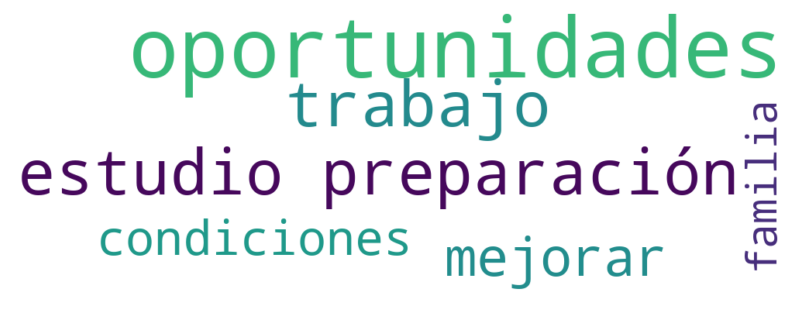

In [17]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

df = pd.read_csv('wordcloud.csv');
text = ' '.join(df['nombres'])

# Crear la nube de palabras
wordcloud = WordCloud(width=1000, height=400, background_color="white").generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


En la nube de palabras se muestran las palabras más comunes emitidas por los votantes en sus respuestas. La capital del país ofrece a la población mayores posibilidades de estudio y preparación, un claro ejemplo, es la carrera de Ciencias de Datos que se estudia únicamente en la Universidad de La Habana, es decir que los que deseen cursar la licenciatura se ven práticamente obligados a emigrar de su provincia natal. Muchos de ellos no regresan a su lugar de origen, en la encuesta, 9 de los votantes estudian en La Habana y son de Matanzas, 8 de los mismos no desean volver a su provincia natal, pues consideran que La Habana posibilita más oportunidades de trabajo, de preparación, en general, mejores condiciones de vida.

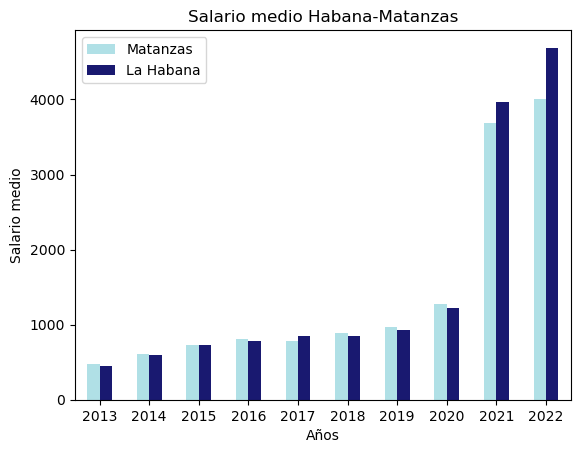

In [22]:
df1 = pd.DataFrame({
    'Años': ['2013', '2014', '2015','2016', '2017', '2018', '2019','2020', '2021', '2022'],
    'Matanzas': [474, 607, 723, 806, 780, 891, 975, 1280, 3689, 4008]
})

df2 = pd.DataFrame({
    'Años': ['2013', '2014', '2015','2016', '2017', '2018', '2019','2020', '2021', '2022'],
    'La Habana': [449, 595, 725, 776, 848, 843, 929, 1224, 3966, 4689]
})

#Combinar los DataFrames
df = pd.merge(df1, df2, on='Años')

#Crear el gráfico de barras agrupadas
ax = df.plot.bar(x='Años', rot=0, color=['powderblue', 'midnightblue'])
ax.set_ylabel('Salario medio')  # Etiqueta del eje y
ax.set_title('Salario medio Habana-Matanzas')  # Título del gráfico
plt.show()